# Initialization

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# use this instead if using google colab:

# Run to access the CSV file
# !git clone https://github.com/refaniefs/rakamin.git
# !pip install --upgrade xlrd

# df = pd.read_csv('/rakamin/final-project/shipping_fix.csv')

In [ ]:
# data path
df = pd.read_csv('shipping.csv')

# Stage 1: EDA

In [ ]:
# getting 5 samples
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1143,1144,B,Ship,3,3,224,2,low,F,37,3220,1
4729,4730,F,Ship,5,3,251,2,low,M,9,4458,0
709,710,F,Ship,7,1,192,3,low,M,38,1372,1
2622,2623,D,Ship,5,3,149,3,medium,F,43,1005,1
2496,2497,D,Ship,4,3,261,3,low,M,42,2664,1


## [1] Descriptive Statistics

In [ ]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [ ]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
# categorical columns 
df[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [ ]:
# Value Counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()
    print('================================')
    print()

Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64


Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64


Value count kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64


Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64




### (A) Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
Semua tipe data sudah sesuai.  Nama kolom dan isinya sudah sesuai, kecuali kolom `Warehouse_block` memiliki data A, B, C, D, F dan bukan A, B, C, D, E sesuai keterangan dari Kaggle.

### (B) Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
Tidak ada data yang memiliki nilai kosong.

### (C) Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
- Pada data `Prior_purchases` terdapat perbedaan yang cukup besar pada mean dan mediannya. Nilai maksimumnya juga sangat besar, sehingga data ini pasti memiliki outliers.
- Pada data `Discount_offered` juga terdapat perbedaan yang besar antara mean dan mediannya. Begitupun nilai maximum nya sangat besar, sehingga data ini juga sudah pasti memiliki outliers.
- Data `Mode_of_Shipment` memiliki data 'Ship' yang sangat besar dibandingkan dengan data yang lain.
- Sedangkan pada data `Product_importance` memiliki data 'high' yang jauh lebih kecil daripada yang lainnya


## [2] Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

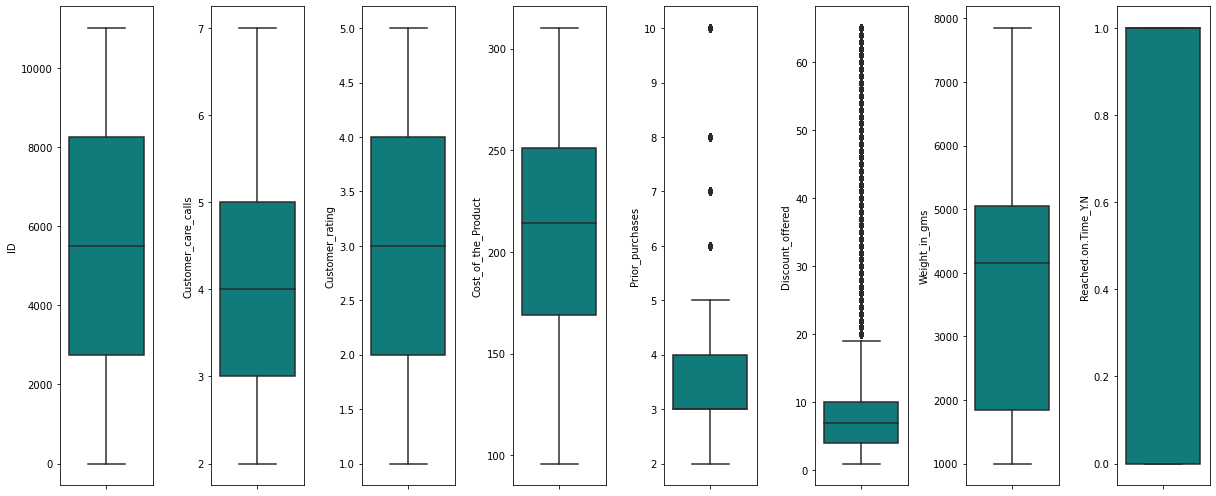

In [ ]:
# features = nums
plt.figure(figsize=(17,7))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='darkcyan', orient='v')
    plt.tight_layout()

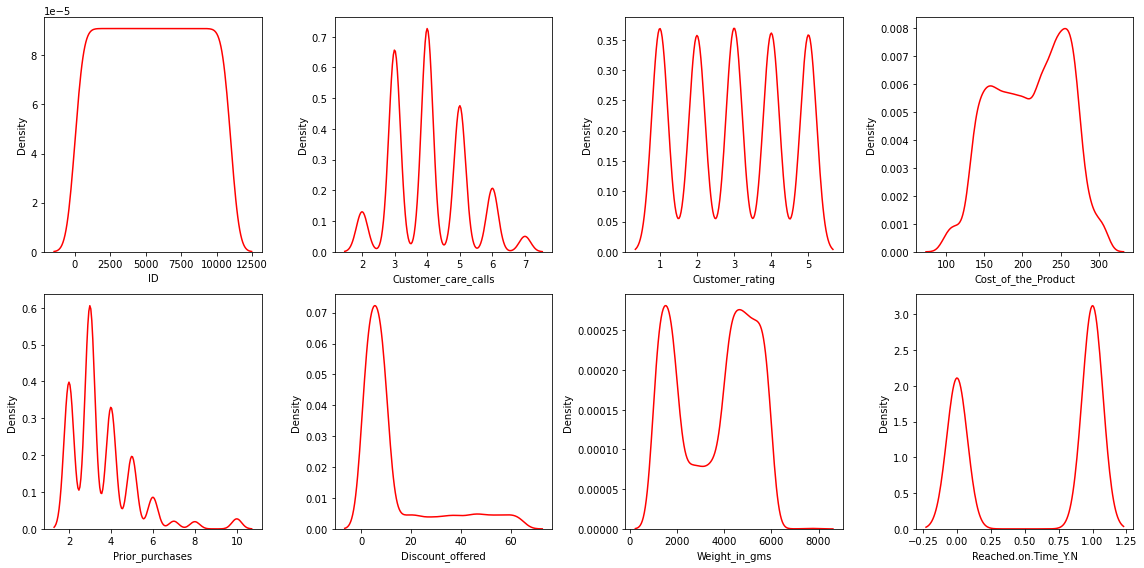

In [ ]:
features = nums
plt.figure(figsize=(16,8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.kdeplot(x=df[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout()

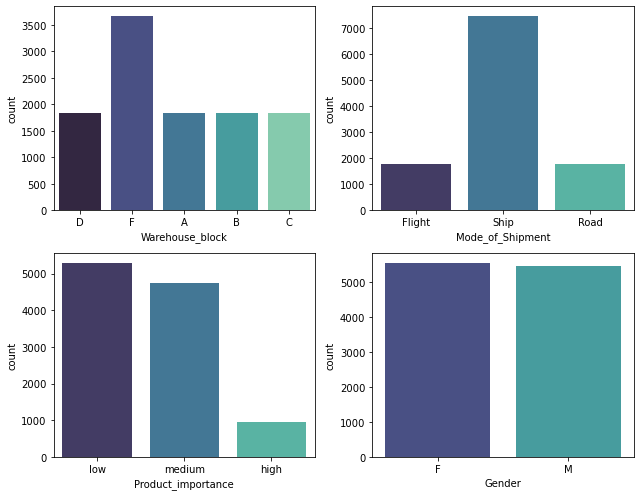

In [ ]:
# categorical data
plt.figure(figsize=(9,7))

for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[cats[i]], palette='mako', orient='v')
    plt.tight_layout()

### Hasil Observasi Univariate Analysis
1. Distribusi data numerik:
- `Customer_care_calls` mendekati normal namun cenderung skew ke kanan.
- `Customer_rating` memiliki distribusi yang cenderung seragam (uniform).
- `Cost_of_the_product` mendekati distribusi normal.
- `Prior_purchases` memiliki distribusi yang skew ke kanan.
- `Discount_offered` terdapat terlalu banyak outlier, distribusi skew ke kanan.
- `Weight_in_gms` memiliki distribusi bimodal dan mean < median.
- `Reached.on.Time_Y.N` memiliki nilai 1 (terlambat) yang lebih banyak dari 0.
2. Distribusi data kategorik:
- "Ship" di `Mode_of_Shipment` terlalu banyak dibandingkan "Flight" dan "Road".
- "F" di `Warehouse_block` terlalu banyak dibandingkan "A", "B", "C", dan "D".
- "High" di `Product_importance` terlalu sedikit dibandingkan "low" dan "medium".
- Distribusi `Gender` cukup seimbang dengan jumlah "F" yang lebih besar dari "M".

### Follow up untuk Data Pre-processing

Ada beberapa hal yang dapat dilakukan saat Data Pre-processing nanti, di antaranya adalah:

1. Kolom numerik:
- Data skew kanan ditransformasi logaritmik mendekati distribusi normal, lalu dapat dibuang outliernya (0.3% atau 5% terluar) atau dibuang outliernya dahulu lalu dinormalisasi atau standardisasi saja.
- Data terlalu banyak outlier dapat dibuang atau dijadikan max value

2. Dapat dikombinasikan:
- Value “high” dengan “medium” di `Product_importance` menjadi "medium-high"
- Value “Flight” dengan “Road” di `Mode_of_Shipment` menjadi "flight-road"

3. Dapat diedit: “F” di Warehouse_block diganti ke “E”
4. Dapat dilakukan Label Encoding: `Product_importance` dan `Gender`
5. Dapat dilakukan One Hot Encoding: `Warehouse_block` dan `Mode_of_Shipment`
6. Dapat dibuang: `ID`, `Customer_care_calls`, `Customer_rating`

## [3] Multivariate Analysis
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas).

### Feature Numerik

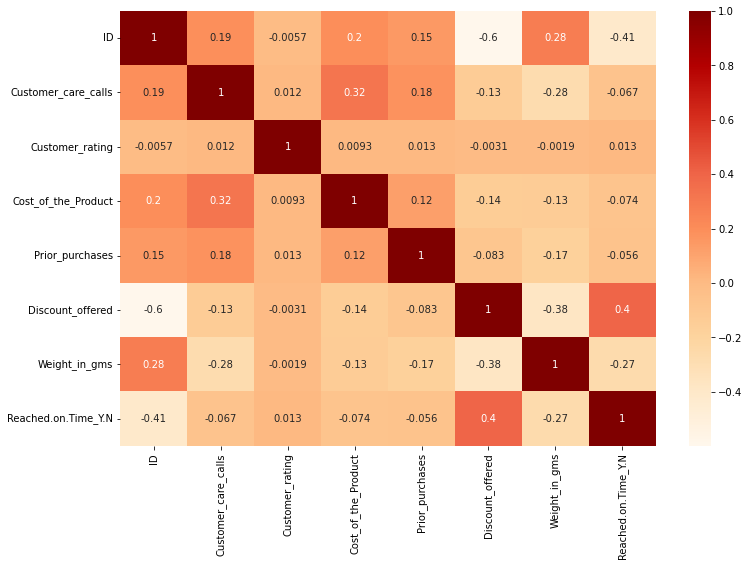

In [ ]:
# correlation heat map
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='OrRd', annot=True, fmt='.2g');

<Figure size 1080x1080 with 0 Axes>

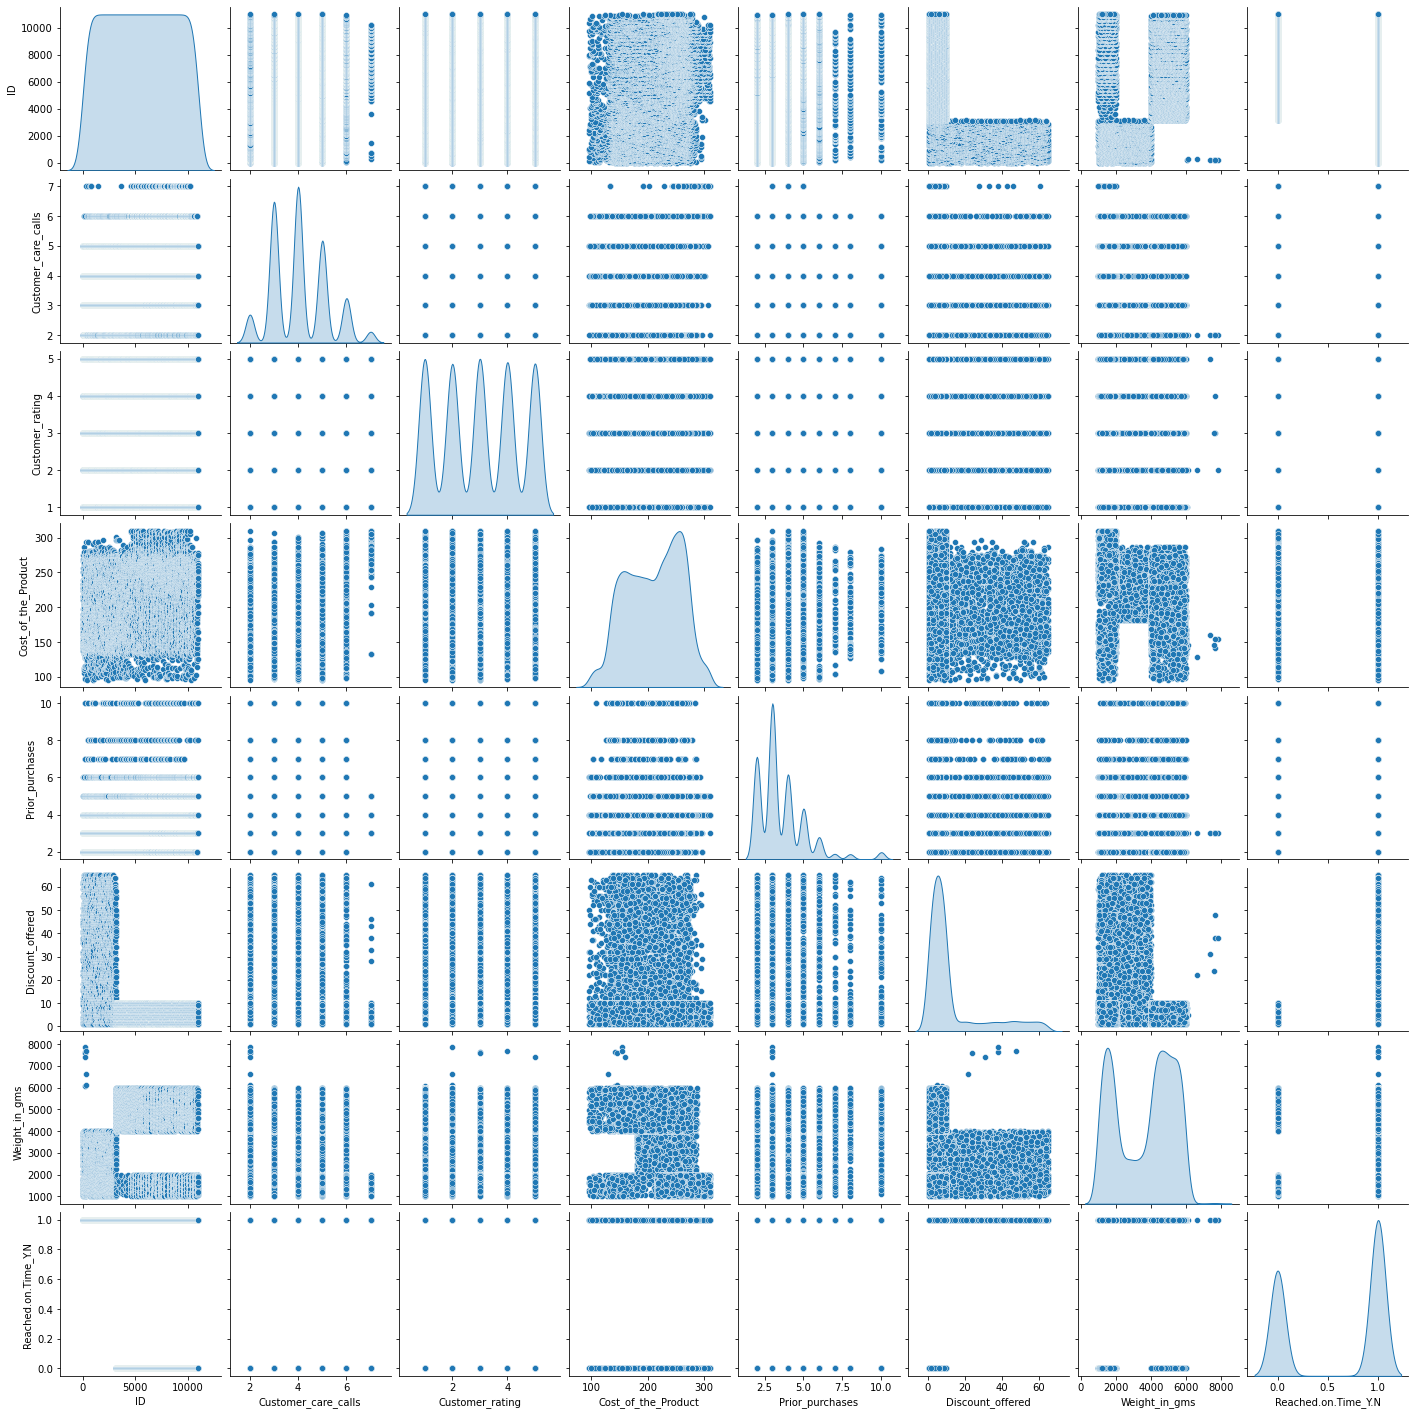

In [ ]:
# correlation pair plots
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show();

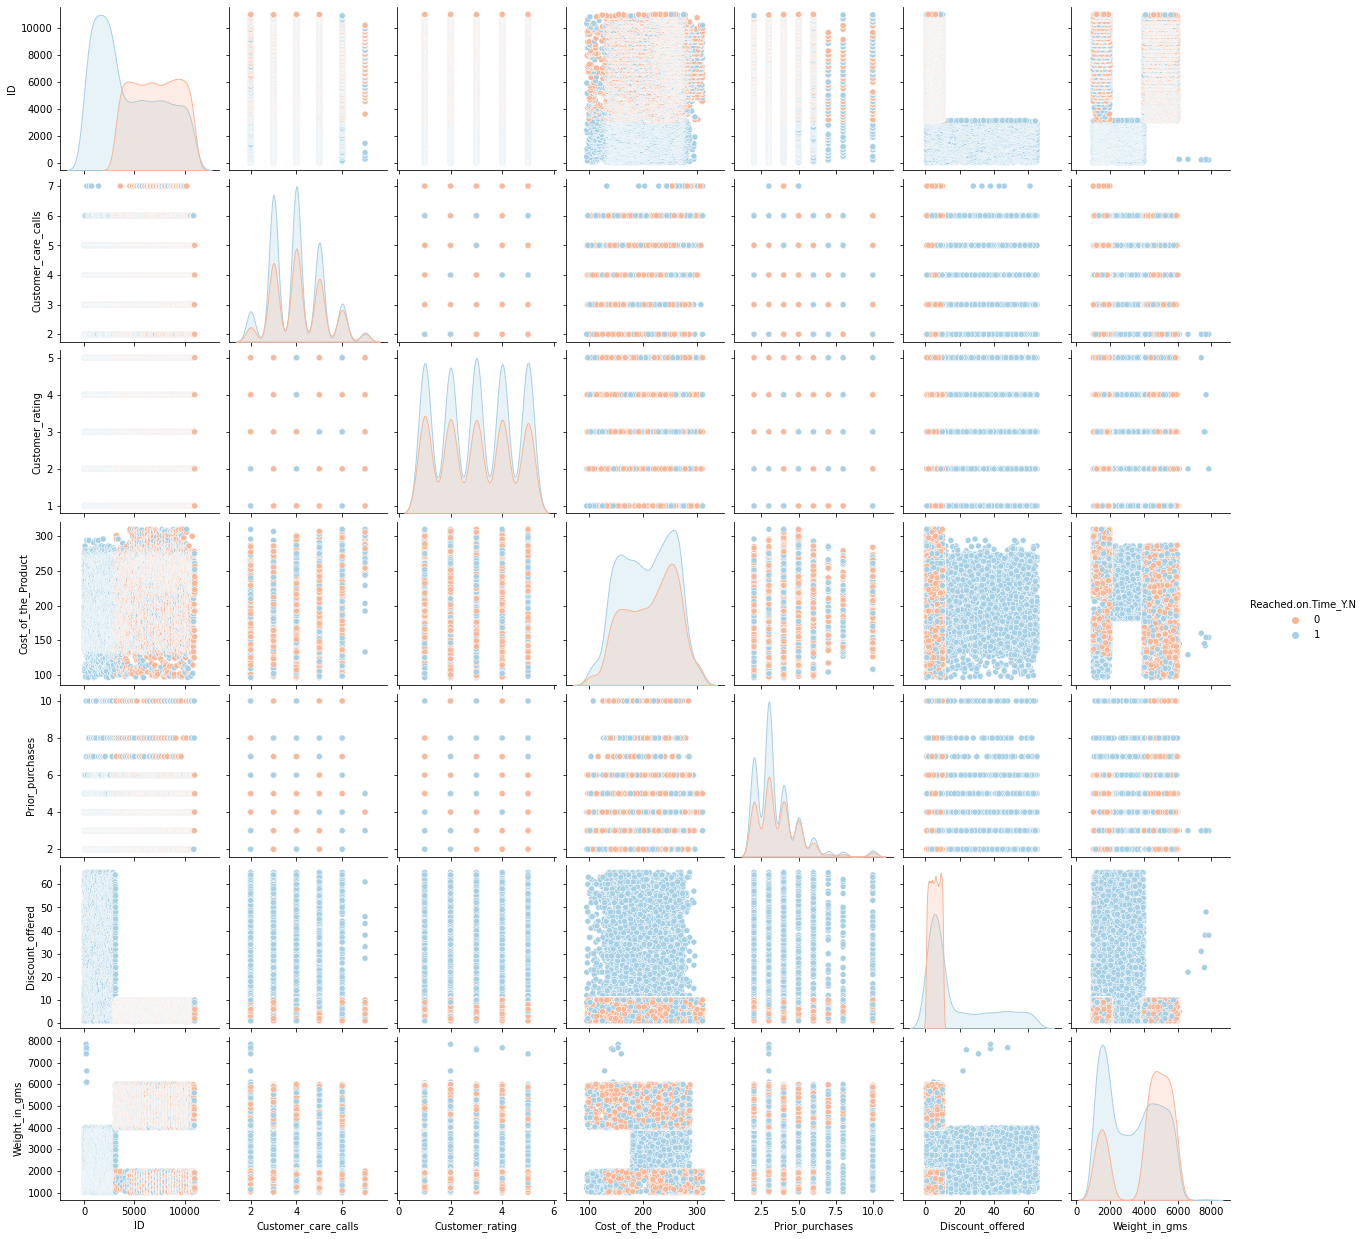

In [ ]:
# correlation pair plots with hue
sns.pairplot(data=df, hue = "Reached.on.Time_Y.N", palette = "RdBu")

### Feature Kategorikal

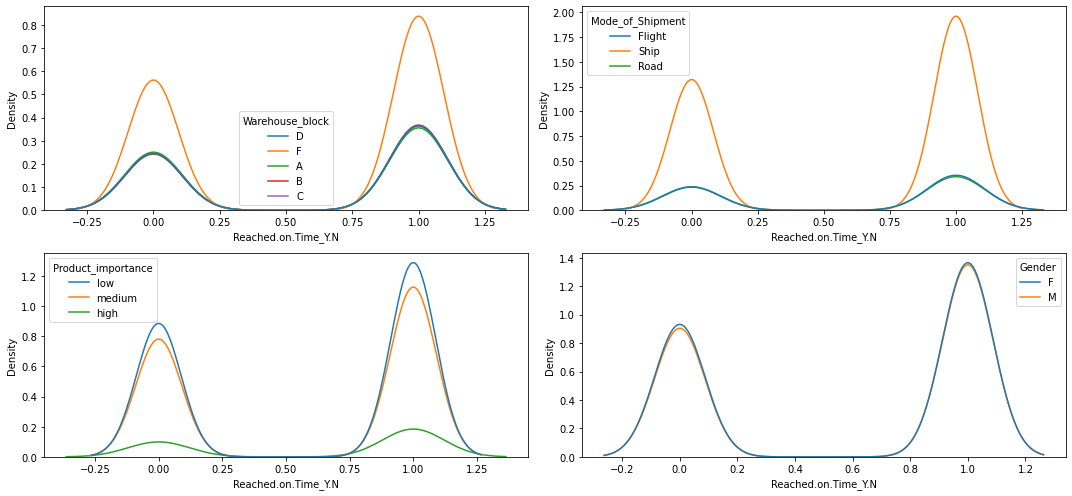

In [ ]:
# category plots
features = cats
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df, x='Reached.on.Time_Y.N', hue=features[i])
    plt.tight_layout()

### (A) Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- |R| < 0.05 : `Customer_rating`
- 0.05 < |R| < 0.1 : `Customer_care_calls`, `Cost_of_the_Product`, `Prior_purchases`
- |R| > 0.1 : `ID`, `Discount_offered`, `Weight_in_gms`

Feature `Discount_offered` cukup berkorelasi dengan `Reached.on.Time_Y.N` dengan nilai korelasi 0,4.

Karena feature yang ada sudah sedikit (11 feature), semua feature akan dipertahankan kecuali feature `ID`.

Semua feature akan diproses lebih lanjut mengingat dataset ini memiliki hanya sedikit feature.

### (B) Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
Semakin besar `Weight_in_gms` maka `Discount_offered` cenderung semakin kecil (korelasi -0,38).

Kolom `Weight_in_gms` dapat didrop karena korelasi terhadap label lebih kecil dibandingkan `Discount_offered`, namun karena jumlah feature yang sudah sedikit, ada kemungkinan kedua kolom tersebut tetap dipertahankan.

## [4] Business Insights
Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

### (1) Feature vs Label

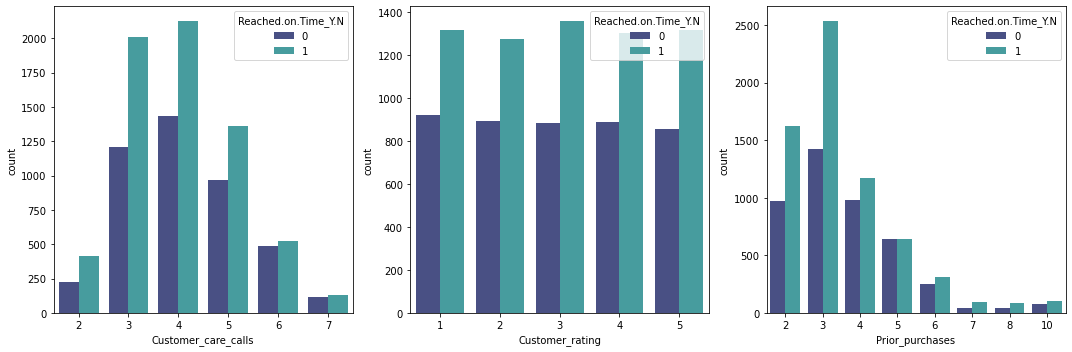

In [ ]:
nums1 = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases']
plt.figure(figsize=(15, 5))
for i in range(0, len(nums1)):
    plt.subplot(1,3, i+1)
    sns.countplot(x = df[nums1[i]], hue=df['Reached.on.Time_Y.N'], orient='v',palette='mako')
    plt.xlabel(nums1[i])
    plt.tight_layout()

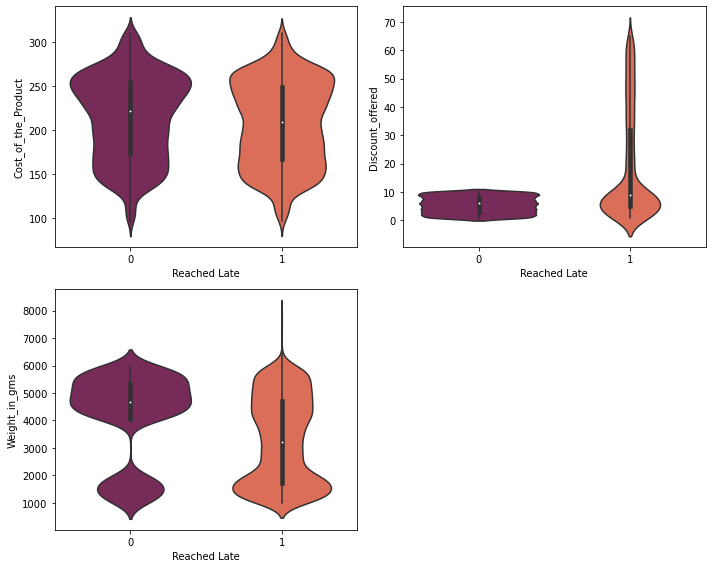

In [ ]:
nums2 = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

plt.figure(figsize=(10,8))
for i in range(0, len(nums2)):
    plt.subplot(2,2, i+1)
    sns.violinplot(x=df['Reached.on.Time_Y.N'],y = df[nums2[i]],orient='v',palette='rocket')
    plt.xlabel('Reached Late')
    plt.ylabel(nums2[i])
    plt.tight_layout()

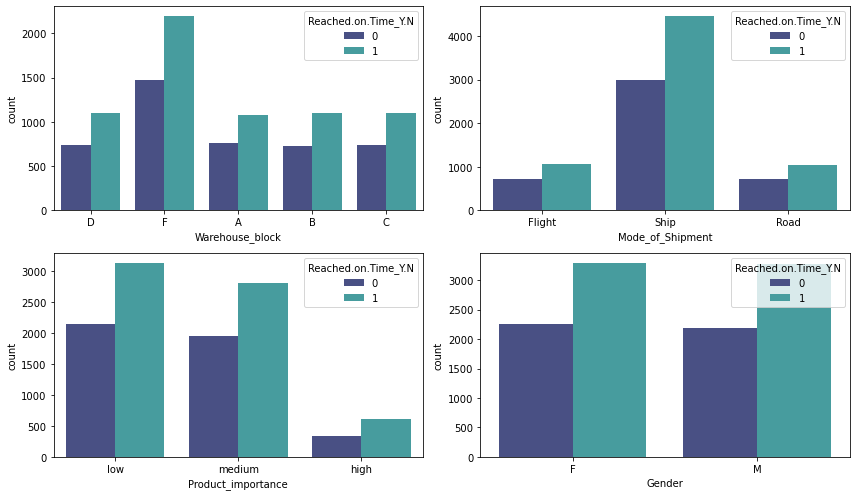

In [ ]:
plt.figure(figsize=(12, 7))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[cats[i]], hue=df['Reached.on.Time_Y.N'], orient='v',palette='mako')
    plt.tight_layout()

- `Customer_care_calls`: Mayoritas pelanggan akan menelepon CS sebanyak 3-4x terlepas produk terlambat atau tidak.
- `Customer_rating`: Pelanggan dengan produk tepat waktu paling banyak memberikan rating 1 dan pelanggan terlambat paling banyak memberikan rating 3.
- `Prior_purchases`: Mayoritas pelanggan telah melakukan pembelian sebanyak 3x sebelumnya, terlepas produknya terlambat atau tidak.
- `Cost_of_the_Product`: Produk yang terlambat memiliki median harga yang lebih rendah dibandingkan dengan produk yang tepat waktu.
- `Discount_offered`: Produk yang diberikan diskon besar cenderung datang terlambat dan produk yang diberikan diskon < \$10 cenderung datang tepat waktu.
- `Weight_in_gms`: Produk yang memiliki berat 4000-5500 gram cenderung datang tepat waktu, sedangkan produk yang datang terlambat cenderung memiliki berat yang lebih ringan. IQR berat produk tepat waktu lebih sempit dibandingkan IQR berat produk terlambat.


- `Warehouse_block`: Mayoritas produk dikirim dari Blok F, terlepas produk datang terlambat atau tidak.
- `Mode_of_Shipment`: Mayoritas produk dikirim menggunakan kapal, terlepas produk datang terlambat atau tidak.
- `Product_importance`: Mayoritas produk memiliki prioritas rendah, terlepas produk datang terlambat atau tidak.
- `Gender`: Mayoritas produk datang terlambat, terlepas dari jenis kelamin pelanggan.

### (2) Keterlambatan Produk berdasarkan Jumlah Pelanggan

In [ ]:
telat1 = df.groupby(['Reached.on.Time_Y.N']).agg({'ID':'nunique'}).reset_index()
telat1.columns = ['Ontime','total']
telat1['Percentage'] = telat1.apply(lambda x: round(x['total']/10999*100,2),axis=1)
telat1

,Ontime,total,Percentage
0,0,4436,40.33
1,1,6563,59.67


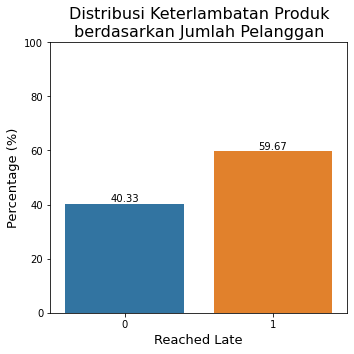

In [ ]:
fig, axes2 = plt.subplots(figsize=(5, 5))

sns.barplot(x='Ontime', y='Percentage', data=telat1);
plt.xlabel('Reached Late', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.ylim(top=100)

plt.title('Distribusi Keterlambatan Produk\nberdasarkan Jumlah Pelanggan', fontsize=16)

for label in axes2.containers:
    axes2.bar_label(label)

plt.tight_layout(pad=1.0);

Dari 10999 data pengiriman produk, terdapat 59.67% produk yang datang terlambat dan 40.33% produk yang datang tepat waktu.

### (3) Calls vs Product Cost

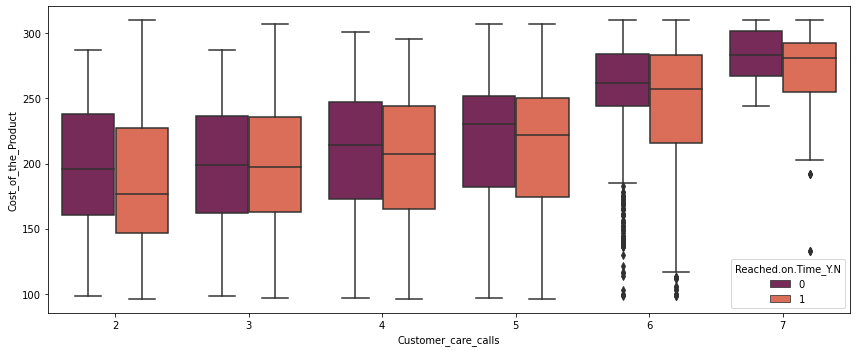

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Customer_care_calls'],y = df['Cost_of_the_Product'], hue=df['Reached.on.Time_Y.N'],orient='v',palette='rocket')
plt.tight_layout()

Semakin tinggi harga sebuah produk, pelanggan akan semakin sering menelepon CS.

### (4) Calls vs Weight

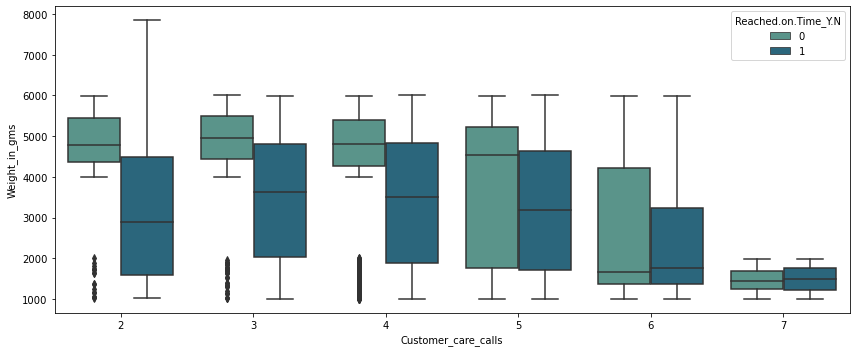

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Customer_care_calls'],y = df['Weight_in_gms'], hue=df['Reached.on.Time_Y.N'],orient='v',palette='crest')
plt.tight_layout()

Semakin rendah berat sebuah produk, pelanggan akan semakin sering menelepon CS.

### (5) Mode of Shipment vs Discount Offered

In [ ]:
mode1 = df.groupby(['Mode_of_Shipment','Reached.on.Time_Y.N']).agg({'ID':'nunique','Discount_offered':'sum'}).reset_index()
mode1.columns = ['Shipment','Arrived Late','Shipment by Arrival','Disc by Arrival']

mode2 = df.groupby(['Mode_of_Shipment']).agg({'Discount_offered':'sum'}).reset_index()
mode2.columns = ['Shipment','Total Discount Given']

mode3 = df.groupby(['Mode_of_Shipment']).agg({'ID':'nunique'}).reset_index()
mode3.columns = ['Shipment','Total Arrival']

mode1 = pd.merge(mode1,mode2,how='left',on='Shipment')
mode1 = pd.merge(mode1,mode3,how='left',on='Shipment')

mode1['Disc Percentage %'] = mode1.apply(lambda x: round(x['Disc by Arrival']/x['Total Discount Given']*100,2),axis=1)
mode1['Arrival Percentage %'] = mode1.apply(lambda x: round(x['Shipment by Arrival']/x['Total Arrival']*100,2),axis=1)

mode1[['Shipment','Arrived Late','Shipment by Arrival','Arrival Percentage %']]

,Shipment,Arrived Late,Shipment by Arrival,Arrival Percentage %
0,Flight,0,708,39.84
1,Flight,1,1069,60.16
2,Road,0,725,41.19
3,Road,1,1035,58.81
4,Ship,0,3003,40.24
5,Ship,1,4459,59.76


[Text(0.5, 1.0, 'Jumlah Keterlambatan pada tiap Moda Pengiriman'),
 (0.0, 5000.0)]

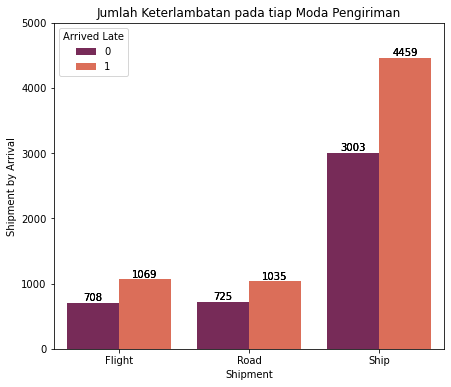

In [ ]:
plt.figure(figsize=(7,6))
ax4 = sns.barplot(x=mode1['Shipment'], y=mode1['Shipment by Arrival'], hue=mode1['Arrived Late'],
                  palette='rocket')
for i in mode1['Arrived Late']:
    ax4.bar_label(ax4.containers[i])
ax4.set(title='Jumlah Keterlambatan pada tiap Moda Pengiriman',ylim=(0, 5000))

In [ ]:
mode1[['Shipment','Arrived Late','Disc by Arrival','Disc Percentage %']]

,Shipment,Arrived Late,Disc by Arrival,Disc Percentage %
0,Flight,0,3914,16.74
1,Flight,1,19473,83.26
2,Road,0,3963,17.21
3,Road,1,19065,82.79
4,Ship,0,16725,16.61
5,Ship,1,83952,83.39


[Text(0.5, 1.0, 'Jumlah diskon yang diberikan pada tiap Moda Pengiriman (dalam USD)'),
 (0.0, 90000.0)]

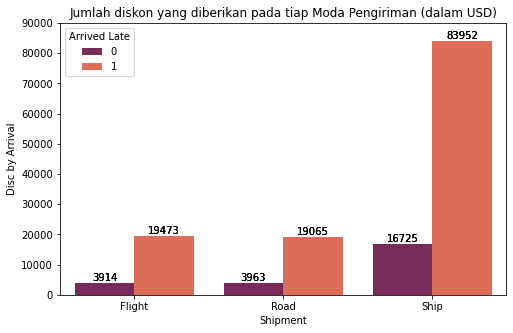

In [ ]:
plt.figure(figsize=(8,5))
ax5 = sns.barplot(x=mode1['Shipment'], y=mode1['Disc by Arrival'], hue=mode1['Arrived Late'],
                  palette='rocket')
for i in mode1['Arrived Late']:
    ax5.bar_label(ax5.containers[i])
ax5.set(title='Jumlah diskon yang diberikan pada tiap Moda Pengiriman (dalam USD)',ylim=(0, 90000))

### (6) Prior Purchases

In [ ]:
prior = df.groupby(['Prior_purchases','Reached.on.Time_Y.N']).agg({'ID':'nunique'}).reset_index()
prior.columns = ['Prior Purchases','Arrived Late','Total Customers']
prior

,Prior Purchases,Arrived Late,Total Customers
0,2,0,974
1,2,1,1625
2,3,0,1421
3,3,1,2534
4,4,0,984
5,4,1,1171
6,5,0,645
7,5,1,642
8,6,0,247
9,6,1,314


[Text(0.5, 1.0, 'Jumlah Pelanggan Berdasarkan Jumlah Pembelian Sebelumnya'),
 (0.0, 3000.0)]

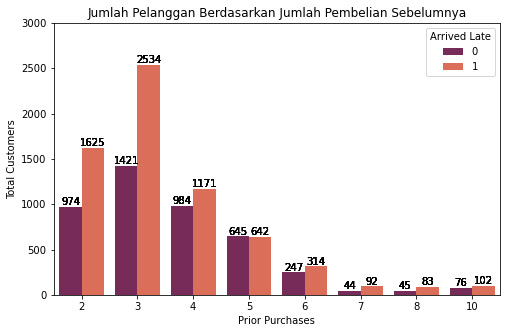

In [ ]:
plt.figure(figsize=(8,5))
ax6 = sns.barplot(x=prior['Prior Purchases'], y=prior['Total Customers'],hue=prior['Arrived Late'], palette='rocket')
for i in prior['Arrived Late']:
    ax6.bar_label(ax6.containers[i])
ax6.set(title='Jumlah Pelanggan Berdasarkan Jumlah Pembelian Sebelumnya',ylim=(0, 3000))

### (7) Weight

<AxesSubplot:xlabel='Weight (gram)', ylabel='Density'>

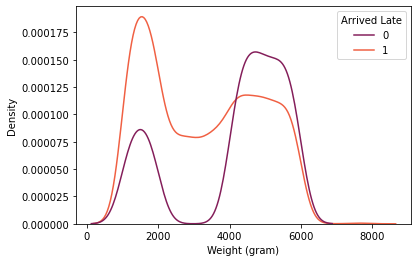

In [ ]:
weight = df[['Weight_in_gms','Reached.on.Time_Y.N']]
weight.columns = ['Weight (gram)','Arrived Late']
sns.kdeplot(x=weight['Weight (gram)'], hue = weight['Arrived Late'], palette = "rocket")

-SELESAI-

# Stage 2: Preprocessing

## [1] Data Cleansing

### (A) Handling Missing Values

In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Tidak ada kolom yang memiliki missing values.

### (B) Handling Duplicated Data

In [ ]:
df.duplicated().any()

False

Tidak ada kolom yang memiliki data duplikat.

### (C) Handling Outliers

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

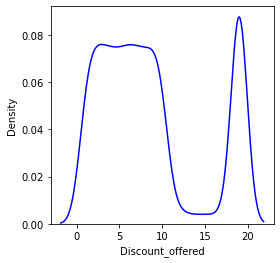

In [ ]:
Q1 = df['Discount_offered'].quantile(0.25)
Q3 = df['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

df['Discount_offered'] = np.where(df['Discount_offered'] > high_limit, high_limit, df['Discount_offered'])
plt.figure(figsize=(4,4))
sns.kdeplot(x=df['Discount_offered'],color='blue')

<AxesSubplot:xlabel='Prior_purchases', ylabel='Density'>

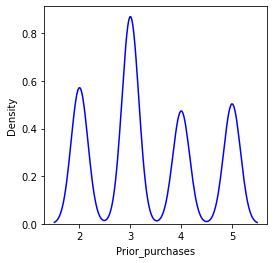

In [ ]:
Q1 = df['Prior_purchases'].quantile(0.25)
Q3 = df['Prior_purchases'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

df['Prior_purchases'] = np.where(df['Prior_purchases'] > high_limit, math.floor(high_limit), df['Prior_purchases'])
plt.figure(figsize=(4,4))
sns.kdeplot(x=df['Prior_purchases'],color='blue')
#sns.countplot(x=df['Prior_purchases'], hue=df['Reached.on.Time_Y.N'], orient='v',palette='mako')

- Kami memutuskan untuk mengganti nilai outlier dari kolom `Discount_offered` dan `Prior_purchases` menjadi nilai 1,5(IQR) masing-masing karena memang nilai outliernya cukup banyak dan besar yang apabila dibuang akan mengurangi informasi dari data di sini.

### (D) Feature Transformation

#### Sebelum Ditransformasi

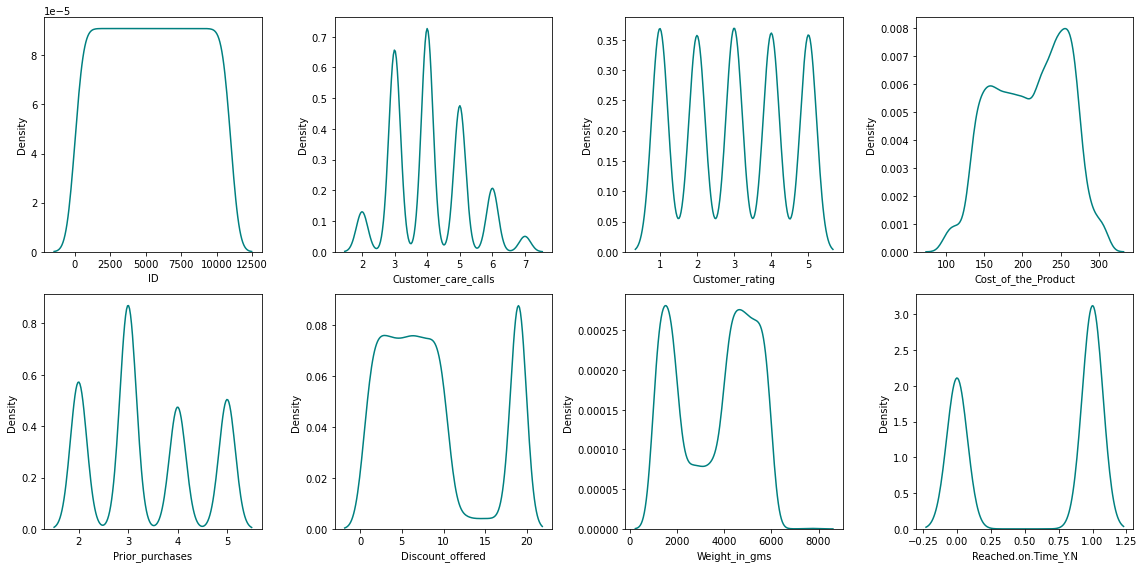

In [ ]:
# Kdeplot sebelum transformasi
features = nums
plt.figure(figsize=(16, 8))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='teal')
    plt.xlabel(features[i])
    plt.tight_layout()

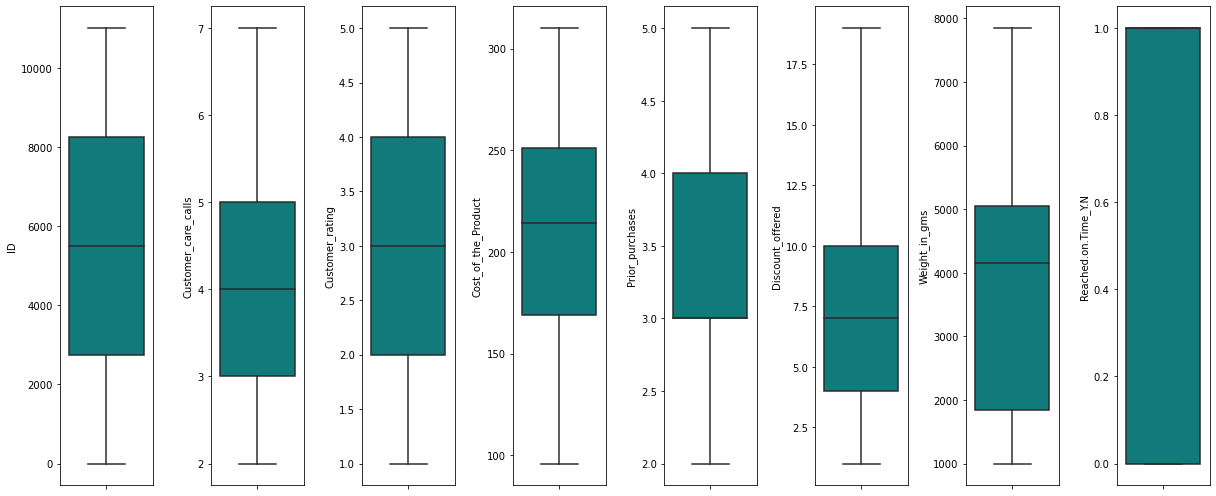

In [ ]:
# Boxplot sebelum transformasi
features = nums
plt.figure(figsize=(17, 7))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='darkcyan', orient='v')
    plt.tight_layout()

#### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
df['Cost_Product_norm'] = MinMaxScaler().fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['Prior_purchase_norm'] = MinMaxScaler().fit_transform(df['Prior_purchases'].values.reshape(len(df), 1))
df['Discount_norm'] = MinMaxScaler().fit_transform(df['Discount_offered'].values.reshape(len(df), 1))
df['Weight_norm'] = MinMaxScaler().fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))

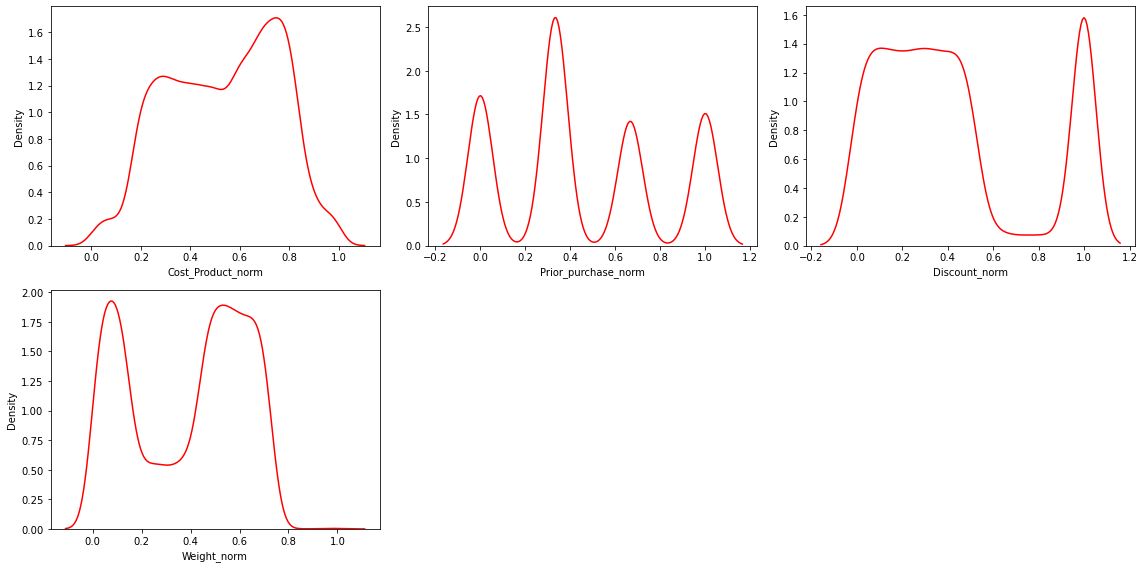

In [ ]:
nums_trans2 = ['Cost_Product_norm','Prior_purchase_norm','Discount_norm','Weight_norm']
features2 = nums_trans2
plt.figure(figsize=(16, 8))
for i in range(0, len(features2)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features2[i]], color='red')
    plt.xlabel(features2[i])
    plt.tight_layout()

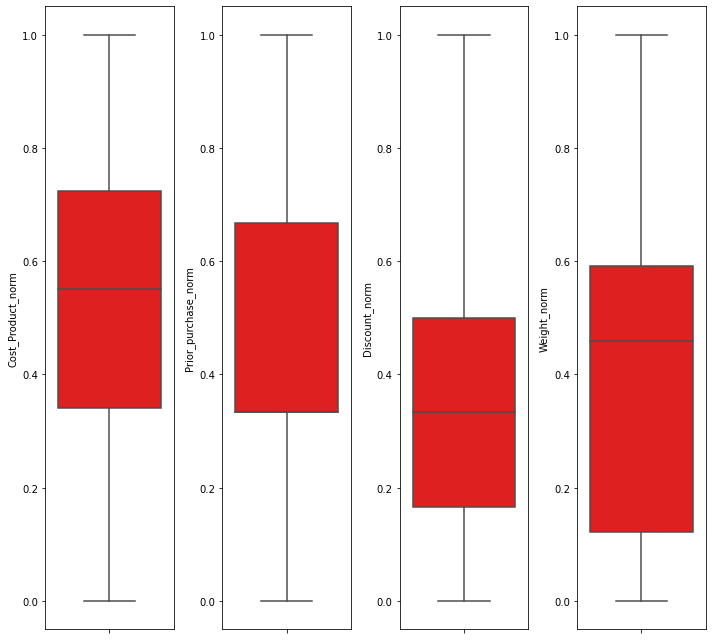

In [ ]:
features2 = nums_trans2
plt.figure(figsize=(10, 9))
for i in range(0, len(features2)):
    plt.subplot(1, len(features2), i+1)
    sns.boxplot(y=df[features2[i]], color='red', orient='v')
    plt.tight_layout()

In [ ]:
df_log = df[['Cost_Product_norm','Prior_purchase_norm','Discount_norm','Weight_norm']]
df_log.describe()

,Cost_Product_norm,Prior_purchase_norm,Discount_norm,Weight_norm
count,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.533630,0.458678,0.421720,0.384663
std,0.224595,0.353353,0.338637,0.238916
min,0.000000,0.000000,0.000000,0.000000
25%,0.341121,0.333333,0.166667,0.122498
50%,0.551402,0.333333,0.333333,0.459898
75%,0.724299,0.666667,0.500000,0.591527
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = df.drop(columns=['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms'])

* Normalisasi digunakan ke feature `Cost_of_the_Product`, `Discount_offered`, `Prior_purchase`, dan `Weight_in_gms`

### (E) Feature Encoding

In [ ]:
# ganti warehouse F ke E
df['Warehouse_block'] = np.where(df['Warehouse_block']=='F', 'E', df['Warehouse_block'])
df['Warehouse_block'].value_counts()

E    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [ ]:
# label encoding mapping cats yang punya 2 distinct value / ordinal
# Product_importance dan Gender
mapping_gender = {
    'F' : 0,
    'M' : 1
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

df['Gender'] = df['Gender'].map(mapping_gender)
df['Product_importance'] = df['Product_importance'].map(mapping_product_importance)

In [ ]:
# Value Counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value count kolom Warehouse_block:
E    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
------------------------------ 

Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
------------------------------ 

Value count kolom Product_importance:
0    5297
1    4754
2     948
Name: Product_importance, dtype: int64
------------------------------ 

Value count kolom Gender:
0    5545
1    5454
Name: Gender, dtype: int64
------------------------------ 



In [ ]:
print(f'Dimensi data sebelum encoding adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

# One hot encoder warehouse block dan mode of shipment
# WARNING: run code ini sekali saja
for cats in ['Warehouse_block', 'Mode_of_Shipment']:
    # onehots, pakai drop_first=True untuk dimension reduction
    onehots = pd.get_dummies(df[cats], prefix=cats) 
    # gabung kolom df dan onehots
    df = pd.concat([df, onehots], axis=1) 
    # drop kolom awal
    df.drop(columns=cats, axis=1, inplace=True) 

print(f'Dimensi data setelah encoding adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

Dimensi data sebelum encoding adalah 10999 baris dan 12 kolom
Dimensi data setelah encoding adalah 10999 baris dan 18 kolom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10999 non-null  int64  
 1   Customer_care_calls      10999 non-null  int64  
 2   Customer_rating          10999 non-null  int64  
 3   Product_importance       10999 non-null  int64  
 4   Gender                   10999 non-null  int64  
 5   Reached.on.Time_Y.N      10999 non-null  int64  
 6   Cost_Product_norm        10999 non-null  float64
 7   Prior_purchase_norm      10999 non-null  float64
 8   Discount_norm            10999 non-null  float64
 9   Weight_norm              10999 non-null  float64
 10  Warehouse_block_A        10999 non-null  uint8  
 11  Warehouse_block_B        10999 non-null  uint8  
 12  Warehouse_block_C        10999 non-null  uint8  
 13  Warehouse_block_D        10999 non-null  uint8  
 14  Warehouse_block_E     

In [ ]:
df.sample(5)

,ID,Customer_care_calls,Customer_rating,Product_importance,Gender,Reached.on.Time_Y.N,Cost_Product_norm,Prior_purchase_norm,Discount_norm,Weight_norm,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_E,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
4598,4599,2,1,1,0,0,0.742991,0.333333,0.000000,0.719942,1,0,0,0,0,0,0,1
8794,8795,3,5,1,1,0,0.429907,0.666667,0.111111,0.442951,0,0,1,0,0,0,0,1
5671,5672,4,2,0,0,1,0.700935,0.333333,0.000000,0.703287,0,0,0,0,1,0,0,1
5139,5140,3,4,1,0,1,0.588785,1.000000,0.500000,0.522717,0,1,0,0,0,0,0,1
8951,8952,6,5,1,1,0,0.252336,0.333333,0.111111,0.693353,0,0,0,0,1,0,0,1


- Dimensi data sebelum encoding adalah 10096 baris dan 10 kolom
- Dimensi data setelah encoding adalah 10096 baris dan 18 kolom

### (F) Handling Class Imbalance

In [ ]:
late = df.groupby(['Reached.on.Time_Y.N']).agg({'ID':'nunique'}).reset_index()
late.columns = ['Late','Total']
late['Percentage'] = late.apply(lambda x: round(x['Total']/10999*100,2),axis=1)
late

,Late,Total,Percentage
0,0,4436,40.33
1,1,6563,59.67


Rasio nilai 0 dan 1 pada kolom target adalah 40:60 dan distribusinya tidak sangat timpang, maka dari itu tidak ada class imbalance pada data ini.

## [2] Feature Engineering

### (A) Feature selection (membuang feature yang kurang relevan atau redundan)

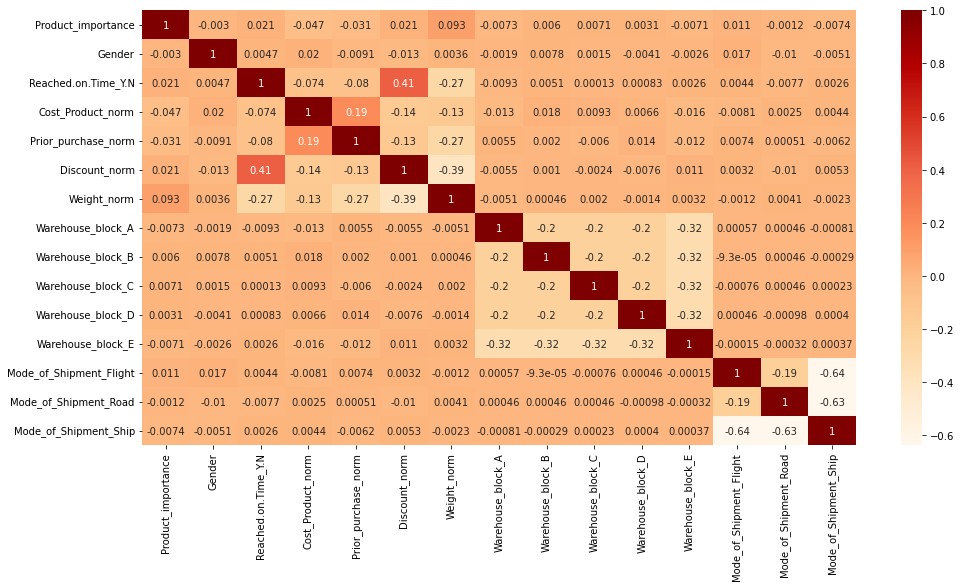

In [ ]:
df = df.drop(columns = ['ID','Customer_care_calls','Customer_rating'])
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), cmap='OrRd', annot=True, fmt='.2g');

Feature yang dibuang, yakni
1. `ID`
2. `Customer_care_calls`
3. `Customer_rating`

Hal ini disebabkan karena seluruh nilai Feature 1 merupakan nilai unik.

Feature 2 dan 3 dibuang karena dapat menyebabkan data leakage, yang berarti bahwa data dari kedua feature ini sebenarnya belum ada di saat model digunakan untuk memprediksi pengiriman akan terlambat atau tidak.

### (B) Feature extraction (membuat feature baru dari feature yang sudah ada)

- Kami tidak menambahkan feature baru.

### (C) Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset)
yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

1. Waktu Pengiriman
- Mengetahui kapan waktu yang sibuk dan longgar di setiap warehouse, sehingga dapat digunakan sebagai alat antisipasi potensi keterlambatan pengiriman.
2. Estimasi Waktu Barang Tiba
- Mengetahui durasi pengiriman barang dari warehouse menuju tempat pengiriman, sehingga dapat membantu model menganalisis tingkat efektifitas dan efisiensi suatu pengiriman.
3. Region (Domestic / International)
- Dokumen dan persyaratan pengiriman internasional memerlukan waktu yang lebih lama, sehingga dapat meningkatkan permodelan yang lebih akurat apabila pengiriman dapat dikategorikan berdasarkan region.
4. Jarak
- Semakin jauh jarak yang ditempuh dalam pengiriman, menyebabkan lamanya waktu pengiriman, dengan adanya fitur jarak diharapkan model dapat memprediksi keterlambatan dari suatu pengiriman.

-SELESAI-

# Stage 3: Modelling & Evaluation

## Function

In [ ]:
def model_eval(clf, pred, xtrain, ytrain, xtest, ytest, ypredproba, ypredtrainproba):
    print("Score: ", round(clf.score(xtest, ytest),4))
    print("Accuracy (Test Set): ", round(accuracy_score(ytest, pred),4))
    print("Precision (Test Set): ", round(precision_score(ytest, pred),4))
    print("Recall (Test Set): ", round(recall_score(ytest, pred),4))
    print("F1-Score (Test Set): ", round(f1_score(ytest, pred),4))
    print('roc-auc (test-proba): ', round(roc_auc_score(ytest, ypredproba[:,1]),4))
    print('roc-auc (train-proba): ', round(roc_auc_score(ytrain, ypredtrainproba[:,1]),4))

## Preprocessed Data

In [ ]:
df.describe()

,Product_importance,Gender,Reached.on.Time_Y.N,Cost_Product_norm,Prior_purchase_norm,Discount_norm,Weight_norm,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_E,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.604600,0.495863,0.596691,0.533630,0.458678,0.421720,0.384663,0.166652,0.166652,0.166652,0.166742,0.333303,0.161560,0.160015,0.678425
std,0.641464,0.500006,0.490584,0.224595,0.353353,0.338637,0.238916,0.372681,0.372681,0.372681,0.372763,0.471415,0.368064,0.366636,0.467102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341121,0.333333,0.166667,0.122498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.551402,0.333333,0.333333,0.459898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.724299,0.666667,0.500000,0.591527,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['Product_importance', 'Gender', 'Reached.on.Time_Y.N',
       'Cost_Product_norm', 'Prior_purchase_norm', 'Discount_norm',
       'Weight_norm', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_E',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship'],
      dtype='object')

## [1] Logistic Regression

In [ ]:
# cek Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df)

,variables,VIF
0,Product_importance,1.014444
1,Gender,1.001220
2,Reached.on.Time_Y.N,1.234545
3,Cost_Product_norm,1.084299
4,Prior_purchase_norm,1.182642
5,Discount_norm,1.448291
6,Weight_norm,1.428584
7,Warehouse_block_A,inf
8,Warehouse_block_B,inf
9,Warehouse_block_C,inf


Khusus untuk model Logistic Regression, feature `Warehouse_block_A` dan `Mode_of_Shipment_Flight` akan dibuang karena dapat menyebabkan dummy variable trap yang disebabkan oleh variabel OneHots Encoding yang memiliki multikolinearitas tinggi, sehingga harus dikurangi satu.

### 1A. Split Data

In [ ]:
X_lr = df.drop(columns=['Reached.on.Time_Y.N','Warehouse_block_A','Mode_of_Shipment_Flight'])
y_lr = df[['Reached.on.Time_Y.N']]

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42,stratify=y_lr)

### 1B. Modelling

In [ ]:
lr = LogisticRegression(random_state=42)

lr.fit(X_lr_train, y_lr_train)

LogisticRegression(random_state=42)

### 1C. Evaluation Metrics

In [ ]:
y_lr_pred = lr.predict(X_lr_test)
y_lr_pred_proba = lr.predict_proba(X_lr_test)
y_lr_pred_train = lr.predict(X_lr_train)
y_lr_pred_train_proba = lr.predict_proba(X_lr_train)

model_eval(lr, y_lr_pred, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_lr_pred_proba, y_lr_pred_train_proba)

Score:  0.6376
Accuracy (Test Set):  0.6376
Precision (Test Set):  0.6924
Recall (Test Set):  0.7064
F1-Score (Test Set):  0.6993
roc-auc (test-proba):  0.7208
roc-auc (train-proba):  0.7209


### 1D. Apakah Model Sudah Best-fit?
Belum bestfit, score penting dapat ditingkatkan menggunakan hyperparameter tuning.

### 1E. Hyperparameter Tuning

In [ ]:
hyperparameterlr = {'penalty':['l1', 'l2'],
                    'C':[0.0001, 0.001, 0.1, 0.02, 0.03, 0.01],
                    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

hplr = RandomizedSearchCV(lr, hyperparameterlr, cv=5, scoring='roc_auc')
hplr.fit(X_lr_train, y_lr_train)

y_lr_pred = hplr.predict(X_lr_test)
y_lr_pred_proba = hplr.predict_proba(X_lr_test)
y_lr_pred_train = hplr.predict(X_lr_train)
y_lr_pred_train_proba = hplr.predict_proba(X_lr_train)

model_eval(hplr, y_lr_pred, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_lr_pred_proba, y_lr_pred_train_proba)
print('      ')
hplr_list = list(hyperparameterlr)
for i in hplr_list:
    print('Best',i,':', hplr.best_estimator_.get_params()[i])

Score:  0.7201
Accuracy (Test Set):  0.6361
Precision (Test Set):  0.6881
Recall (Test Set):  0.7136
F1-Score (Test Set):  0.7006
roc-auc (test-proba):  0.7201
roc-auc (train-proba):  0.7203
      
Best penalty : l2
Best C : 0.1
Best solver : saga


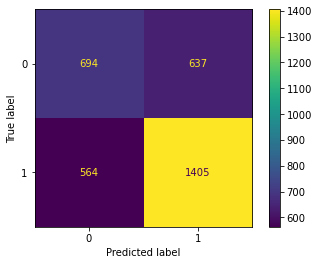

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(hplr, X_lr_test, y_lr_test)

## [2] Other ML Algorithms

### 1A. Split Data

In [ ]:
X = df.drop(columns=['Reached.on.Time_Y.N'])
y = df[['Reached.on.Time_Y.N']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

### 1B. Modelling

In [ ]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Support Vector Machine (RBF Kernel)": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGboost": XGBClassifier(random_state=42)
}


### 1C. Evaluation Metrics

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_train_proba = model.predict_proba(X_train)
    print(name)
    print('          ')
    model_eval(model, y_pred, X_train, y_train, X_test, y_test, y_pred_proba, y_pred_train_proba)
    print('          ')
    print('==========================================================')
    print('          ')

K-Nearest Neighbors
          
Score:  0.6209
Accuracy (Test Set):  0.6209
Precision (Test Set):  0.6945
Recall (Test Set):  0.6511
F1-Score (Test Set):  0.6721
roc-auc (test-proba):  0.6865
roc-auc (train-proba):  0.8584
          
          
Decision Tree
          
Score:  0.6476
Accuracy (Test Set):  0.6476
Precision (Test Set):  0.7069
Recall (Test Set):  0.6993
F1-Score (Test Set):  0.7031
roc-auc (test-proba):  0.6352
roc-auc (train-proba):  1.0
          
          
Random Forest
          
Score:  0.6585
Accuracy (Test Set):  0.6585
Precision (Test Set):  0.7425
Recall (Test Set):  0.6546
F1-Score (Test Set):  0.6958
roc-auc (test-proba):  0.7336
roc-auc (train-proba):  1.0
          
          
Gradient Boosting
          
Score:  0.6761
Accuracy (Test Set):  0.6761
Precision (Test Set):  0.9061
Recall (Test Set):  0.5099
F1-Score (Test Set):  0.6526
roc-auc (test-proba):  0.7353
roc-auc (train-proba):  0.8154
          
          
Gaussian Naive Bayes
          
Score:  0.65

### 1D. Apakah Model Sudah Best-fit?
Belum bestfit, score penting dapat ditingkatkan menggunakan hyperparameter tuning.

### 1E. Hyperparameter Tuning

In [ ]:
# DesicionTree Hyperparameter Tuning
hyperparameterdt = {'max_depth' : [int(x) for x in np.linspace(1, 100, num = 30)], # Maximum number of levels in tree, 
                    'min_samples_split' : [2, 5, 10, 100], # Minimum number of samples required to split a node, 
                    'min_samples_leaf' : [1, 2, 4, 10, 20, 50], # Minimum number of samples required at each leaf node,
                    'max_features' : ['auto', 'sqrt','log2'] # Number of features to consider at every split
                    }

# RandomForest Hyperparameter Tuning
hyperparameterrf = {'n_estimators' : [int(x) for x in np.linspace(1, 10, num = 10)],
                    'max_depth' : [int(x) for x in np.linspace(1, 10, num = 3)], # Maximum number of levels in tree
                    'min_samples_split' : [int(x) for x in np.linspace(1, 40, num = 30)], # Minimum number of samples required to split a node
                    'min_samples_leaf' : [int(x) for x in np.linspace(1, 20, num = 30)], # Minimum number of samples required at each leaf node
                    'max_features' : ['auto', 'sqrt','log2'], # Number of features to consider at every split
                    'criterion' : ['gini', 'entropy']
                   }

# K-Nearest Neighbors Hyperparameter Tuning]
hyperparameterkn = {'leaf_size' : list(range(1,50)),
                    'n_neighbors' : list(range(1,30)),
                    'p' : [1,2]
                   }

# Gaussian Naive Bayes Hyperparameter Tuning
hyperparameterNB = {'var_smoothing' : [int(x) for x in np.linspace(0,100, num=10)] 
                   }

# Gradient Boosting hyperparameter Tuning
hyperparametergb = {'n_estimators' : [2,6,8,10],
                    'max_depth' : [int(x) for x in np.linspace(1, 100, num = 5)], # Maximum number of levels in tree
                    'learning_rate' : [0.01,0.1,1,10]
                   }

# # Adaboost hyperparameter Tuning
# n_estimators = [int(x) for x in np.linspace(100, 2000, 1000)],
# learning_rate = [float(x) for x in np.linspace(0.001, 0.1, 100)],
# algorithm = ['SAMME', 'SAMME.R']
# hyperparameterab = dict(
#                         n_estimators = n_estimators,
#                         algorithm = algorithm, 
#                         learning_rate = learning_rate 
#                         )

# XGBoost hyperparameter Tuning
hyperparameterxgb = {'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
                    'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
                    'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
                    'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)],
                    }

In [ ]:
models = {
    "K-Nearest Neighbors tuned": RandomizedSearchCV(KNeighborsClassifier(), hyperparameterkn, cv=5, scoring='roc_auc'),
    "Decision Tree tuned": RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), hyperparameterdt, cv=5, scoring='roc_auc'),
    # "Support Vector Machine (RBF Kernel)": SVC(),
    "Random Forest tuned": RandomizedSearchCV(RandomForestClassifier(random_state = 42), hyperparameterrf, cv=5, scoring='roc_auc'),
    "Gradient Boosting tuned": RandomizedSearchCV(GradientBoostingClassifier(random_state = 42), hyperparametergb, cv=5, scoring='roc_auc'),
    "Gaussian Naive Bayes tuned": RandomizedSearchCV(GaussianNB(), hyperparameterNB, cv=5, verbose=1, scoring='roc_auc'),
    # "AdaBoost tuned": RandomizedSearchCV(AdaBoostClassifier(random_state = 42), hyperparametergb, cv=5, scoring='roc_auc'),
    "XGboost tuned": RandomizedSearchCV(XGBClassifier(random_state = 42), hyperparametergb, cv=5, scoring='roc_auc')
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_train_proba = model.predict_proba(X_train)
    print(name)
    print('          ')
    model_eval(model, y_pred, X_train, y_train, X_test, y_test, y_pred_proba, y_pred_train_proba)
    print('          ')
    print('==========================================================')
    print('          ')

K-Nearest Neighbors tuned
          
Score:  0.699
Accuracy (Test Set):  0.6273
Precision (Test Set):  0.7084
Recall (Test Set):  0.6379
F1-Score (Test Set):  0.6713
roc-auc (test-proba):  0.699
roc-auc (train-proba):  0.8053
          
          
Decision Tree tuned
          
Score:  0.726
Accuracy (Test Set):  0.6491
Precision (Test Set):  0.7412
Recall (Test Set):  0.6328
F1-Score (Test Set):  0.6827
roc-auc (test-proba):  0.726
roc-auc (train-proba):  0.8053
          
          
Random Forest tuned
          
Score:  0.7386
Accuracy (Test Set):  0.6648
Precision (Test Set):  0.7856
Recall (Test Set):  0.6028
F1-Score (Test Set):  0.6822
roc-auc (test-proba):  0.7386
roc-auc (train-proba):  0.8421
          
          
Gradient Boosting tuned
          
Score:  0.7252
Accuracy (Test Set):  0.6427
Precision (Test Set):  0.711
Recall (Test Set):  0.676
F1-Score (Test Set):  0.693
roc-auc (test-proba):  0.7249
roc-auc (train-proba):  1.0
          
          
Fitting 5 folds for each

## [3] Model Best Fit

Dari sekian model yang dicoba di atas, model dengan best fit adalah model Logistic Regression.

Kami memprioritaskan:
1. AUC score yang tinggi dan tidak memiliki perbedaan jauh di antara AUC-train dan AUC-test
2. Recall score

Model Logistic Regression:
- Score:  0.7201
- Accuracy (Test Set):  0.6361
- Precision (Test Set):  0.6881
- Recall (Test Set):  0.7136
- F1-Score (Test Set):  0.7006
- roc-auc (test-proba):  0.7201
- roc-auc (train-proba):  0.7203

Best parameters dari model ini:
- Best penalty : l2
- Best C : 0.1
- Best solver : saga

## [4] Feature Importance

In [ ]:
best_lr = LogisticRegression(penalty='l2', C=0.1, solver='saga',random_state=42)
best_lr.fit(X_lr_train, y_lr_train)

importance = best_lr.coef_[0]

# summarize feature importance
feats_i = []
feats = []
feats_s = []
for i,v in enumerate(importance):
    feats_i.append(i+1)
    feats.append(X_lr_train.columns[i])
    feats_s.append(v)
    
feat_imp = pd.DataFrame({
#    '#': feats_i,
    'Feature': feats,
    'Score' : feats_s
})
#	print('Feature',i,':', X_llr_train.columns[i],'\nScore:',v,'\n------------------')

feat_imp

,Feature,Score
0,Product_importance,0.074202
1,Gender,0.048333
2,Cost_Product_norm,-0.420324
3,Prior_purchase_norm,-0.580930
4,Discount_norm,2.540145
5,Weight_norm,-1.616171
6,Warehouse_block_B,0.058177
7,Warehouse_block_C,-0.052241
8,Warehouse_block_D,0.064327
9,Warehouse_block_E,0.018660


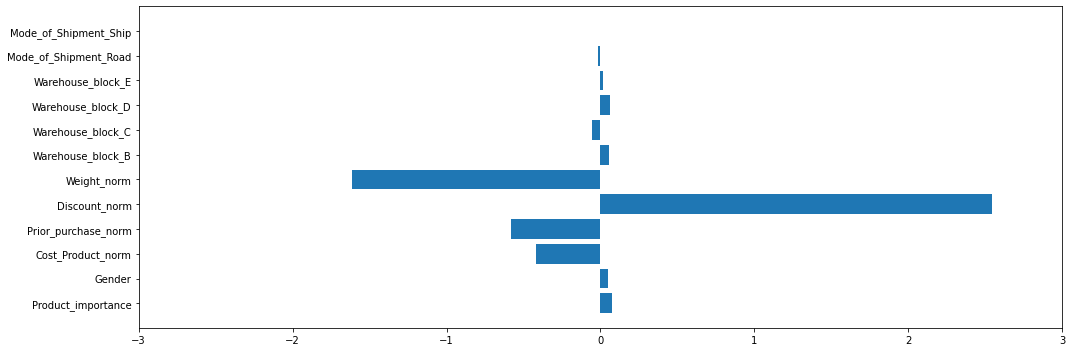

In [ ]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.barh([feats[x] for x in range(len(importance))],importance)
plt.xlim(-3,3)
plt.tight_layout()
plt.show()

- `Discount_norm` memiliki score sebesar 2.540145
- `Weight_norm` memiliki score sebesar -1.616171
- `Prior_purchase_norm` memiliki score sebesar -0.580930
- `Cost_Product_norm` memiliki score sebesar -0.420324

### Asumsi Penyebab Keterlambatan dari Pengaruh Feature Importance terhadap Hasil Prediksi:
Tepat sebelum data ini diambil, perusahaan menerapkan event jangka pendek yang cukup masif untuk meningkatkan penjualan, adapun program event dapat diikuti dengan syarat pelanggan sbb:
- Setiap pelanggan mendapatkan diskon khusus;
- Program ini khusus barang dengan berat < 5000 gram;
- Tidak berlaku untuk pelanggan lama

Akibat perhitungan yang kurang matang dari program yang dijalankan, maka terjadi keterlambatan hampir di setiap produknya.

# -SELESAI-